In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

d:\py36_dp\deeplearning\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
d:\py36_dp\deeplearning\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
d:\py36_dp\deeplearning\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


### k-means

In [42]:
def assignment(df, centroids, colmap):
    for i in centroids.keys():
        # distance
        df['distance_from_{}'.format(i)] = np.sqrt((df['x'] - centroids[i][0])**2 + (df['y'] - centroids[i][1])**2)
    # color
    distance_from_centroid_id = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, distance_from_centroid_id].idxmin(axis=1) # ???
    df['closest'] = df['closest'].map(lambda x: float(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

def update(df, centroids):
    # recalculate th centroids
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return centroids

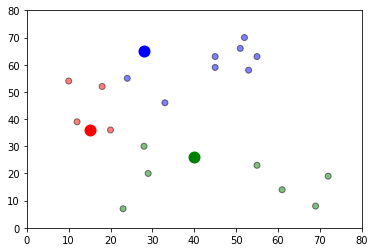

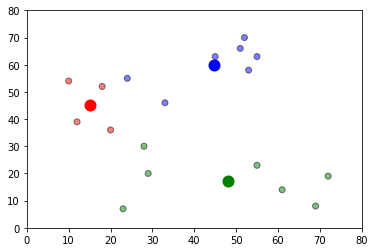

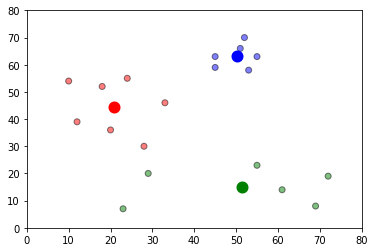

In [43]:
df = pd.DataFrame({
    'x':[12, 20, 28, 18, 10, 29, 33, 24, 45, 45, 52, 51, 55, 53, 55, 61, 69, 72, 23], 
    'y':[39, 36, 30, 52, 54, 20, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14,  8, 19, 7]})

k = 3

# randomly choose centroids
centroids = {i: [np.random.randint(0, 80), np.random.randint(0, 80)] for i in range(k)}
colmap = {0: 'r', 1: 'g', 2: 'b'}
df = assignment(df, centroids, colmap)

plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], linewidths=6)
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

for i in range(10):
    plt.close()
    
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(df, centroids)
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colmap[i], linewidths=6)
    plt.xlim(0, 80)
    plt.ylim(0, 80)
    plt.show()
    
    df = assignment(df, centroids, colmap)
    if closest_centroids.equals(df['closest']):
        break